In [1]:
using Turing, Distributions
using Reactive, Interact, Gadfly, Compose

    +(AbstractArray, DataArrays.DataArray) at /Users/kai/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/kai/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/kai/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/kai/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


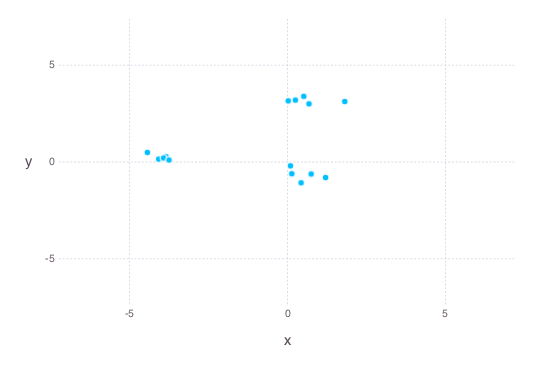

In [188]:
N = 3 # number of clusters
M = 5 # number of data points in each cluster

xs = Array([])
for i = 1:N
    x1s = randn(M) / 2
    x2s = randn(M) / 2
    dx, dy = (rand() - 0.5) * 10, (rand() - 0.5) * 10
    append!(xs, Array([[x1s[i] + dx; x2s[i] + dy] for i = 1:M]))
end

# Plot data points
d_layer = layer(x=map(e -> e[1], xs), y=map(e -> e[2], xs), Geom.point)

plot(d_layer, Coord.Cartesian(xmin=-7, xmax=7, ymin=-7, ymax=7))

In [203]:
N = length(xs)
M = 3

@model gmm begin
    mus = TArray(Vector, M)
    for i = 1:M
        @assume mus[i] ~ MvNormal([0, 0], [20 0; 0 20])
    end
    
    cs = tzeros(Int, N)
    for i = 1:N
        @assume cs[i] ~ Categorical(M)
        @observe xs[i] ~ MvNormal(mus[cs[i]], [1/2 0; 0 1/2])
    end
    @predict mus cs
end

gmm (generic function with 1 method)

In [209]:
chain = sample(gmm, PG(50, 100));

mus = mean(chain[:mus]);
cs = mean(chain[:cs]);

[PG]: Iter 1 out of 100
[PG]: Iter 2 out of 100
[PG]: Iter 3 out of 100
[PG]: Iter 4 out of 100
[PG]: Iter 5 out of 100
[PG]: Iter 6 out of 100
[PG]: Iter 7 out of 100
[PG]: Iter 8 out of 100
[PG]: Iter 9 out of 100
[PG]: Iter 10 out of 100
[PG]: Iter 11 out of 100
[PG]: Iter 12 out of 100
[PG]: Iter 13 out of 100
[PG]: Iter 14 out of 100
[PG]: Iter 15 out of 100
[PG]: Iter 16 out of 100
[PG]: Iter 17 out of 100
[PG]: Iter 18 out of 100
[PG]: Iter 19 out of 100
[PG]: Iter 20 out of 100
[PG]: Iter 21 out of 100
[PG]: Iter 22 out of 100
[PG]: Iter 23 out of 100
[PG]: Iter 24 out of 100
[PG]: Iter 25 out of 100
[PG]: Iter 26 out of 100
[PG]: Iter 27 out of 100
[PG]: Iter 28 out of 100
[PG]: Iter 29 out of 100
[PG]: Iter 30 out of 100
[PG]: Iter 31 out of 100
[PG]: Iter 32 out of 100
[PG]: Iter 33 out of 100
[PG]: Iter 34 out of 100
[PG]: Iter 35 out of 100
[PG]: Iter 36 out of 100
[PG]: Iter 37 out of 100
[PG]: Iter 38 out of 100
[PG]: Iter 39 out of 100
[PG]: Iter 40 out of 100
[PG]: Ite

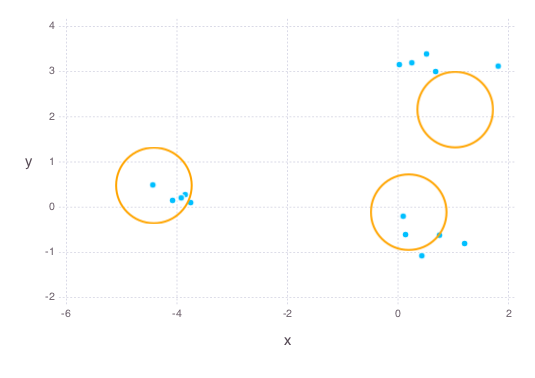

In [210]:
plot(d_layer, 
    Guide.annotation(
        compose(context(), circle([e[1] for e in mus], [e[2] for e in mus], [10mm]), fill(nothing), stroke(colorant"orange"))
    ))